In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import requests
import numpy as np

!pip install imblearn
!pip install delayed

!pip install pydotplus
import pydotplus

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Importing all the necessary libraries 

In [16]:
COVIDdf = pd.read_csv('COVID19 cases.csv')

#Creating data frame for first dataset
#Importing and reading CSV file

In [17]:
NPdf = pd.read_csv('neighbourhood-profiles-2016-csv.csv', index_col= "_id")

#Creating data frame for second dataset
#Importing and reading CSV file

In [18]:
COVIDdf.info()

#Collecting information on dataset, columns, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112025 entries, 0 to 112024
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   _id                     112025 non-null  int64 
 1   Assigned_ID             112025 non-null  int64 
 2   Outbreak Associated     112025 non-null  object
 3   Age Group               111945 non-null  object
 4   Neighbourhood Name      110061 non-null  object
 5   FSA                     110773 non-null  object
 6   Source of Infection     112025 non-null  object
 7   Classification          112025 non-null  object
 8   Episode Date            112025 non-null  object
 9   Reported Date           112025 non-null  object
 10  Client Gender           112025 non-null  object
 11  Outcome                 112025 non-null  object
 12  Currently Hospitalized  112025 non-null  object
 13  Currently in ICU        112025 non-null  object
 14  Currently Intubated     112025 non-n

In [19]:
COVIDdf = COVIDdf.drop(["_id","Assigned_ID", "Outbreak Associated", "FSA", "Source of Infection", "Classification",
                        "Episode Date","Currently Hospitalized","Currently in ICU","Currently Intubated", "Ever Hospitalized", 
                        "Reported Date", "Ever in ICU","Ever Intubated"], axis =1)

#Cleaning the dataset
#Removing unnecessary columns in the dataset

In [20]:
print(COVIDdf.isnull().sum())

#Checking dataset for any null values

Age Group               80
Neighbourhood Name    1964
Client Gender            0
Outcome                  0
dtype: int64


In [21]:
COVIDdf = COVIDdf.dropna()
COVIDdf.count()

#Dropping null values to clean dataset

Age Group             110006
Neighbourhood Name    110006
Client Gender         110006
Outcome               110006
dtype: int64

Downsview-Roding-CFB                 3092
Woburn                               3068
Mount Olive-Silverstone-Jamestown    2940
West Humber-Clairville               2689
Rouge                                2576
                                     ... 
Lambton Baby Point                    156
Blake-Jones                           154
Woodbine-Lumsden                      154
Bridle Path-Sunnybrook-York Mills     141
Runnymede-Bloor West Village          117
Name: Neighbourhood Name, Length: 140, dtype: int64


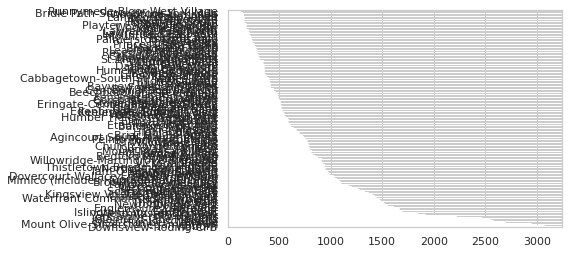

In [22]:
print(COVIDdf["Neighbourhood Name"].value_counts())
COVIDdf["Neighbourhood Name"].value_counts().plot(kind = 'barh')

#Finding value count of each neighbourhood
#Plotting neighbourhood value count as a graph 
#Plotting to see COVID contraction density within each neighbourhood

20 to 29 Years    21948
30 to 39 Years    18272
50 to 59 Years    16119
40 to 49 Years    15693
19 and younger    14781
60 to 69 Years    10380
70 to 79 Years     5345
80 to 89 Years     4654
90 and older       2814
Name: Age Group, dtype: int64


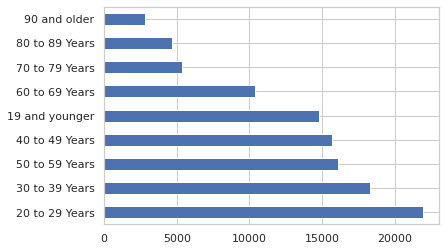

In [23]:
print(COVIDdf["Age Group"].value_counts())
COVIDdf["Age Group"].value_counts().plot(kind = 'barh')

#Finding value count of each age group
#Plotting as bar graph
#Plotting to see age distrubution among COVID cases

FEMALE         55220
MALE           53821
UNKNOWN          918
OTHER             20
TRANSGENDER       19
NON-BINARY         8
Name: Client Gender, dtype: int64


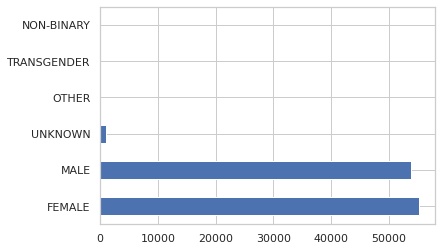

In [24]:
print(COVIDdf["Client Gender"].value_counts())
COVIDdf["Client Gender"].value_counts().plot(kind = 'barh')

#Finding value count of each gender group
#Plotting as bar graph
#Plotting to find gender breakdown among COVID cases

RESOLVED    100346
ACTIVE        6901
FATAL         2759
Name: Outcome, dtype: int64


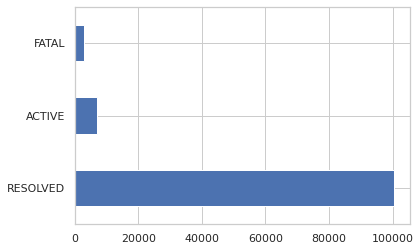

In [25]:
print(COVIDdf["Outcome"].value_counts())
COVIDdf["Outcome"].value_counts().plot(kind = 'barh')

#Finding value count of each outcome group
#Plotting as bar graph
#Plotting to find outcome breakdown among COVID contracted cases

In [26]:
agesexTable = COVIDdf.groupby(["Age Group"])["Client Gender"].value_counts()
agesexTable

#Finding the gender group breakdown within each age

Age Group       Client Gender
19 and younger  MALE              7704
                FEMALE            6941
                UNKNOWN            133
                OTHER                2
                TRANSGENDER          1
20 to 29 Years  MALE             11405
                FEMALE           10339
                UNKNOWN            188
                TRANSGENDER          6
                NON-BINARY           5
                OTHER                5
30 to 39 Years  MALE              9247
                FEMALE            8858
                UNKNOWN            154
                OTHER                5
                TRANSGENDER          5
                NON-BINARY           3
40 to 49 Years  FEMALE            8215
                MALE              7328
                UNKNOWN            141
                TRANSGENDER          5
                OTHER                4
50 to 59 Years  FEMALE            8401
                MALE              7598
                UNKNOWN           

In [27]:
NPagesexTable = COVIDdf.groupby(["Neighbourhood Name", "Age Group"])["Client Gender"].value_counts()
print(NPagesexTable)

#Finding the age and gender group breakdown within each neighbourhood

Neighbourhood Name  Age Group       Client Gender
Agincourt North     19 and younger  FEMALE            52
                                    MALE              43
                    20 to 29 Years  FEMALE           105
                                    MALE             104
                                    UNKNOWN            1
                                                    ... 
Yorkdale-Glen Park  70 to 79 Years  FEMALE            27
                    80 to 89 Years  FEMALE            81
                                    MALE              41
                    90 and older    FEMALE            63
                                    MALE              16
Name: Client Gender, Length: 2989, dtype: int64


In [28]:
NPdf.reset_index(drop=True, inplace=True)
NPdf.set_index("Category", inplace=True)
NPdf.head()

#Cleaning the dataset
#Resetting index to narrow down unwanted columns + rows

,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Category,,,,,,,,,,,,,,,,,,,,,
Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,...,37,7,137,64,60,94,100,97,27,31
Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695","15,873",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177","26,918","15,434",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [29]:
NPdf = NPdf.drop(['Aboriginal peoples','Education', 'Families, households and marital status','Housing','Immigration and citizenship',
                  'Journey to work', 'Labour','Language', 'Language of work','Mobility', 'Neighbourhood Information', 'Population',
                  'Visible minority'])

#Dropping all the unwanted columns in the NPdf dataset

In [30]:
NPdf.reset_index(drop=True, inplace=True)
NPdf.set_index("Topic", inplace=True)

#Resetting the index as "Topic" to further clean dataset

In [31]:
NPdf = NPdf.drop(['Income of individuals in 2015', 'Income of economic families in 2015', 'Income sources', 'Income taxes', 
                  'Low income in 2015'])

#Data cleaning
#Dropping more unwanted columns

In [32]:
NPdf.reset_index(drop=True, inplace=True)
NPdf = NPdf.drop(["Data Source"], axis=1)
NPdf = NPdf.drop_duplicates(subset = "Characteristic", keep = "first")

#Data cleaning
#Resetting the index 
#Removing duplicate values under "Characteristic" column

In [33]:
NPdf.set_index("Characteristic", inplace=True)

#Data cleaning
#Setting index column as "Characteristic"

In [34]:
NPdf = NPdf.dropna()

#Dropping all null values

In [35]:
NPdf = NPdf.drop(['Total - Income statistics in 2015 for private households by household size - 100% data', 
                  '    Total - Income statistics in 2015 for one-person private households - 100% data'])

NPdf = NPdf.drop(['    Total - Income statistics in 2015 for two-or-more-person private households - 100% data', 
                  'Total - Income statistics in 2015for private households by household size - 25% sampledata'])

NPdf = NPdf.drop(['  Average after-tax income of households in 2015 ($)',
                  '    Total - Income statistics in 2015 for one-person private households - 25% sample data'])

NPdf= NPdf.drop(['Total - Household total income groups in 2015 for private households - 100% data',
                 'Total - Household after-tax income groups in 2015 for private households - 100% data', 
                 '    Total - Income statistics in 2015 for two-or-more-person private households - 25% sample data'])

#Dropping further columns to filter out specific income related data values

In [36]:
NPdf = NPdf.drop_duplicates(keep = "first")

#Dropping any duplicates within dataset
#Choosing the first value to stay within dataframe

In [37]:
NPdf= NPdf.T

#Transposing dataframe to be able to get the characterisitcs as columns, with neighbourhoods as rows

In [38]:
NPdf = NPdf.drop(['    $150,000 to $199,999', '    $100,000 to $124,999', '    $125,000 to $149,999', '    $200,000 and over'], axis = 1)

#Dropping unnecessary columns to filter out specific income related data values for dataset

In [39]:
for col in NPdf.columns:
    print(col)
    
#Printing all the income related and ethnicity related columns within dataset

  $15,000 to $19,999
  Under $5,000
  $5,000 to $9,999
  $10,000 to $14,999
  $20,000 to $24,999
  $25,000 to $29,999
  $30,000 to $34,999
  $35,000 to $39,999
  $40,000 to $44,999
  $45,000 to $49,999
  $50,000 to $59,999
  $60,000 to $69,999
  $70,000 to $79,999
  $80,000 to $89,999
  $90,000 to $99,999
  $100,000 and over
 Guadeloupean
 Scottish
Total - Ethnic origin for the population in private households - 25% sample data
 North American Aboriginal origins
 First Nations (North American Indian)
 Inuit
 Mtis
 Other North American origins
 Acadian
 American
 Canadian
 New Brunswicker
 Newfoundlander
 Nova Scotian
 Ontarian
 Qubcois
 Portuguese
 Other North American origins; n.i.e.
 European origins
 British Isles origins
 Channel Islander
 Cornish
 English
 Irish
 Manx
 Welsh
 British Isles origins; n.i.e.
 French origins
 Alsatian
 Breton
 Corsican
 French
 Western European origins (except French origins)
 Austrian
 Bavarian
 Belgian
 Dutch
 Flemish
 Frisian
 German
 Luxembourger


In [40]:
data = ['  Under $5,000', '  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999', '  $20,000 to $24,999', 
                                  '  $25,000 to $29,999', '  $30,000 to $34,999', '  $35,000 to $39,999','  $40,000 to $44,999','  $45,000 to $49,999',
                                  '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999', '  $80,000 to $89,999', '  $90,000 to $99,999',
                                  '  $100,000 and over']
IncomeProfile = NPdf.loc[:,data]

#Creating new dataframe specifically for Income Profile from Neighbourhood Profile dataframe 

In [41]:
IncomeProfile.dtypes

#Returning data types of columns in dataframe

Characteristic
  Under $5,000          object
  $5,000 to $9,999      object
  $10,000 to $14,999    object
  $15,000 to $19,999    object
  $20,000 to $24,999    object
  $25,000 to $29,999    object
  $30,000 to $34,999    object
  $35,000 to $39,999    object
  $40,000 to $44,999    object
  $45,000 to $49,999    object
  $50,000 to $59,999    object
  $60,000 to $69,999    object
  $70,000 to $79,999    object
  $80,000 to $89,999    object
  $90,000 to $99,999    object
  $100,000 and over     object
dtype: object

In [42]:
IncomeProfile = IncomeProfile.replace(',', '', regex=True)

#Fixing cell values of IncomeProfile
#Removing the ',' in cell values

In [43]:
c = IncomeProfile.select_dtypes(object).columns
IncomeProfile[c] = IncomeProfile[c].apply(pd.to_numeric,errors='coerce')

#Converting cell values from object into integer

In [44]:
IncomeProfile.dtypes

#Checking to see values converted from object into integer

Characteristic
  Under $5,000          int64
  $5,000 to $9,999      int64
  $10,000 to $14,999    int64
  $15,000 to $19,999    int64
  $20,000 to $24,999    int64
  $25,000 to $29,999    int64
  $30,000 to $34,999    int64
  $35,000 to $39,999    int64
  $40,000 to $44,999    int64
  $45,000 to $49,999    int64
  $50,000 to $59,999    int64
  $60,000 to $69,999    int64
  $70,000 to $79,999    int64
  $80,000 to $89,999    int64
  $90,000 to $99,999    int64
  $100,000 and over     int64
dtype: object

In [45]:
IncomeProfile = IncomeProfile.T

In [46]:
AvgIncomeProfile = IncomeProfile

#Creating new dataframe
#Copying IncomeProfile df into AvgIncomeProfile df 

In [47]:
AvgIncomeProfile.index

#Checking index column in new dataframe

Index(['  Under $5,000', '  $5,000 to $9,999', '  $10,000 to $14,999',
       '  $15,000 to $19,999', '  $20,000 to $24,999', '  $25,000 to $29,999',
       '  $30,000 to $34,999', '  $35,000 to $39,999', '  $40,000 to $44,999',
       '  $45,000 to $49,999', '  $50,000 to $59,999', '  $60,000 to $69,999',
       '  $70,000 to $79,999', '  $80,000 to $89,999', '  $90,000 to $99,999',
       '  $100,000 and over'],
      dtype='object', name='Characteristic')

In [48]:
AvgIncomeProfile = AvgIncomeProfile.drop(['City of Toronto'], axis=1)

#Dropping unnecessary column for this dataframe

In [49]:
AvgIncomeProfile['Average'] = 0

#Creating new column 'Average' for AvgIncomeProfile

In [50]:
AvgIncomeProfile.index

Index(['  Under $5,000', '  $5,000 to $9,999', '  $10,000 to $14,999',
       '  $15,000 to $19,999', '  $20,000 to $24,999', '  $25,000 to $29,999',
       '  $30,000 to $34,999', '  $35,000 to $39,999', '  $40,000 to $44,999',
       '  $45,000 to $49,999', '  $50,000 to $59,999', '  $60,000 to $69,999',
       '  $70,000 to $79,999', '  $80,000 to $89,999', '  $90,000 to $99,999',
       '  $100,000 and over'],
      dtype='object', name='Characteristic')

In [51]:
AvgIncomeProfile.loc['  Under $5,000']['Average'] = 2500
AvgIncomeProfile.loc['  $5,000 to $9,999']['Average'] = 7500
AvgIncomeProfile.loc['  $10,000 to $14,999']['Average'] = 12500
AvgIncomeProfile.loc['  $15,000 to $19,999']['Average'] = 17500
AvgIncomeProfile.loc['  $20,000 to $24,999']['Average'] = 22500
AvgIncomeProfile.loc['  $25,000 to $29,999']['Average'] = 27500
AvgIncomeProfile.loc['  $30,000 to $34,999']['Average'] = 32500
AvgIncomeProfile.loc['  $35,000 to $39,999']['Average'] = 37500
AvgIncomeProfile.loc['  $40,000 to $44,999']['Average'] = 42500
AvgIncomeProfile.loc['  $45,000 to $49,999']['Average'] = 47500
AvgIncomeProfile.loc['  $50,000 to $59,999']['Average'] = 55000
AvgIncomeProfile.loc['  $60,000 to $69,999']['Average'] = 65000
AvgIncomeProfile.loc['  $70,000 to $79,999']['Average'] = 75000
AvgIncomeProfile.loc['  $80,000 to $89,999']['Average'] = 85000
AvgIncomeProfile.loc['  $90,000 to $99,999']['Average'] = 95000
AvgIncomeProfile.loc['  $100,000 and over']['Average'] = 100000

#Adding values into 'Average' column with median value of each Income range (index column)

In [52]:
for col in AvgIncomeProfile.columns:
    if col != 'Average':
        AvgIncomeProfile[col] *= AvgIncomeProfile['Average']

#Creating 'for' loop to calculate product of 'Average' column with each cell value
#Cell value represents number of people that have x income range within each neighbourhood
#First step to finding average income of each neighbourhood

In [53]:
AvgIncomeProfile

#Printing dataframe to see if loop produced required results

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,Average
Characteristic,,,,,,,,,,,,,,,,,,,,,
"Under $5,000",387500,787500,137500,2125000,662500,325000,6275000,1462500,225000,350000,...,225000,1087500,162500,137500,300000,512500,537500,862500,250000,2500
"$5,000 to $9,999",787500,1050000,337500,3637500,1162500,637500,5512500,1950000,525000,637500,...,637500,3412500,937500,487500,900000,787500,900000,1725000,487500,7500
"$10,000 to $14,999",2000000,2437500,1000000,8187500,2937500,1937500,9250000,3625000,1000000,1875000,...,1937500,8562500,3312500,1312500,2312500,1812500,2312500,4250000,1500000,12500
"$15,000 to $19,999",7875000,4637500,1575000,12950000,7000000,7262500,12075000,5775000,2275000,4637500,...,5162500,20475000,5512500,3412500,6912500,3062500,3850000,9100000,3850000,17500
"$20,000 to $24,999",7200000,7087500,3262500,13950000,8887500,5512500,13050000,8212500,4500000,5175000,...,8212500,18562500,6187500,3375000,7312500,3937500,5062500,11812500,5512500,22500
"$25,000 to $29,999",14850000,11000000,4125000,14575000,12237500,6325000,15400000,10175000,4675000,5912500,...,10862500,26400000,5225000,3712500,7425000,4675000,6050000,14437500,6600000,27500
"$30,000 to $34,999",13650000,12025000,5037500,17062500,13162500,7150000,15925000,11700000,6662500,7475000,...,12187500,29575000,7312500,3575000,7312500,6175000,6987500,19175000,9425000,32500
"$35,000 to $39,999",17062500,14437500,6375000,20812500,17625000,9562500,19312500,12375000,6750000,8062500,...,14062500,35625000,6000000,4875000,8437500,7875000,8812500,21375000,10312500,37500
"$40,000 to $44,999",17850000,15725000,6800000,22950000,19550000,10200000,18700000,14875000,8500000,9562500,...,16150000,40587500,8075000,4887500,9562500,8287500,11050000,22525000,11900000,42500


In [54]:
FinalIncomeProfile = pd.DataFrame(index = ['FinalAvg'], columns = IncomeProfile.columns)
FinalIncomeProfile = FinalIncomeProfile.drop(['City of Toronto'], axis = 1)

#Creating new dataframe to calculate average income of each neighbourhood
#Using columns from IncomeProfile DF to copy into new dataframe
#Dropping columm "City of Toronto", as it is not needed

In [55]:
FinalIncomeProfile

#Printing dataframe to visualize

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
FinalAvg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
for col in FinalIncomeProfile.columns:
    FinalIncomeProfile[col] = round((AvgIncomeProfile[col].sum()/IncomeProfile[col].sum()),2)

#Creating for loop to calculate last step to finding average income for each neighbourhood
#Weighted average

In [57]:
FinalIncomeProfile

#Printing dataframe with newly calculated averages

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
FinalAvg,63840.26,61861.54,73110.09,64160.38,69756.2,65366.26,51264.12,63312.76,69692.14,77376.45,...,59240.07,67736.21,58190.57,66700.27,67184.78,63372.24,69617.08,69789.01,56878.07,63622.54


In [58]:
#Want to merge FinalAvg values from FinalIncomeProfile into COVIDdf for further analysis 

In [59]:
Neighbourhoodlist = FinalIncomeProfile.T

#Creating new variable 'Neighbourhoodlist'
#Transoposing FinalIncomeProfile in order to get neighbourhood names as rows, with FinalAvg as column

In [60]:
Neighbourhoodlist

,FinalAvg
Agincourt North,63840.26
Agincourt South-Malvern West,61861.54
Alderwood,73110.09
Annex,64160.38
Banbury-Don Mills,69756.20
...,...
Wychwood,63372.24
Yonge-Eglinton,69617.08
Yonge-St.Clair,69789.01
York University Heights,56878.07


In [61]:
Neighbourhoodlist = Neighbourhoodlist.to_dict()

#Changing Neighbourhoodlist from dataframe into dictionary
#Making this change will make it possible to add FinalAvg onto COVIDdf

In [62]:
Neighbourhoodlist

{'FinalAvg': {'Agincourt North': 63840.26,
  'Agincourt South-Malvern West': 61861.54,
  'Alderwood': 73110.09,
  'Annex': 64160.38,
  'Banbury-Don Mills': 69756.2,
  'Bathurst Manor': 65366.26,
  'Bay Street Corridor': 51264.12,
  'Bayview Village': 63312.76,
  'Bayview Woods-Steeles': 69692.14,
  'Bedford Park-Nortown': 77376.45,
  'Beechborough-Greenbrook': 51937.15,
  'Bendale': 60398.65,
  'Birchcliffe-Cliffside': 66908.65,
  'Black Creek': 51197.06,
  'Blake-Jones': 62588.57,
  'Briar Hill-Belgravia': 61088.0,
  'Bridle Path-Sunnybrook-York Mills': 86982.23,
  'Broadview North': 56875.55,
  'Brookhaven-Amesbury': 56687.84,
  'Cabbagetown-South St. James Town': 60437.4,
  'Caledonia-Fairbank': 64444.82,
  'Casa Loma': 72599.08,
  'Centennial Scarborough': 83986.87,
  'Church-Yonge Corridor': 56852.79,
  'Clairlea-Birchmount': 65765.8,
  'Clanton Park': 65532.44,
  'Cliffcrest': 67150.13,
  'Corso Italia-Davenport': 66377.27,
  'Danforth': 66859.06,
  'Danforth East York': 69283.17

In [63]:
COVIDdf['NeighbourhoodAvgIncome'] = 0

#Creating new column in COVIDdf to add neighbourhood average income

In [64]:
COVIDdf['NeighbourhoodAvgIncome'] = COVIDdf['Neighbourhood Name'].map(Neighbourhoodlist['FinalAvg'])

#Using Neighbourhoodlist to average income, by matching with neighbourhood names

In [65]:
OutcomeNames = COVIDdf[COVIDdf['Outcome'] == 'ACTIVE'].index

COVIDdf.drop(OutcomeNames, inplace = True)
COVIDdf

#Data prep for analysis
#Dropping 'ACTIVE' in COVIDdf.Outcomes because not needed for analysis

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
0,50 to 59 Years,Willowdale East,FEMALE,RESOLVED,59734.63
1,50 to 59 Years,Willowdale East,MALE,RESOLVED,59734.63
2,20 to 29 Years,Parkwoods-Donalda,FEMALE,RESOLVED,63747.65
3,60 to 69 Years,Church-Yonge Corridor,FEMALE,RESOLVED,56852.79
4,60 to 69 Years,Church-Yonge Corridor,MALE,RESOLVED,56852.79
...,...,...,...,...,...
111484,19 and younger,Kensington-Chinatown,MALE,RESOLVED,50219.07
111552,19 and younger,L'Amoreaux,MALE,RESOLVED,60667.94
111642,30 to 39 Years,Cliffcrest,FEMALE,RESOLVED,67150.13
112005,19 and younger,Weston,FEMALE,RESOLVED,52083.88


In [66]:
OutcomeRandomization = COVIDdf

#Creating identical COVIDdf dataframe to be used for randomized dropping of values

In [67]:
OutcomeRandomization

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
0,50 to 59 Years,Willowdale East,FEMALE,RESOLVED,59734.63
1,50 to 59 Years,Willowdale East,MALE,RESOLVED,59734.63
2,20 to 29 Years,Parkwoods-Donalda,FEMALE,RESOLVED,63747.65
3,60 to 69 Years,Church-Yonge Corridor,FEMALE,RESOLVED,56852.79
4,60 to 69 Years,Church-Yonge Corridor,MALE,RESOLVED,56852.79
...,...,...,...,...,...
111484,19 and younger,Kensington-Chinatown,MALE,RESOLVED,50219.07
111552,19 and younger,L'Amoreaux,MALE,RESOLVED,60667.94
111642,30 to 39 Years,Cliffcrest,FEMALE,RESOLVED,67150.13
112005,19 and younger,Weston,FEMALE,RESOLVED,52083.88


In [68]:
COVIDdf = COVIDdf.loc[COVIDdf['Outcome'] == 'FATAL']
COVIDdf

#Choosing to only keep 'Outcome' values with only 'FATAL' in COVIDdf

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
76,70 to 79 Years,Victoria Village,MALE,FATAL,55650.78
263,60 to 69 Years,Niagara,MALE,FATAL,70100.51
266,90 and older,Morningside,MALE,FATAL,61257.47
274,90 and older,O'Connor-Parkview,MALE,FATAL,61003.34
290,70 to 79 Years,Don Valley Village,MALE,FATAL,62859.47
...,...,...,...,...,...
105961,70 to 79 Years,Flemingdon Park,FEMALE,FATAL,53544.73
107283,60 to 69 Years,York University Heights,FEMALE,FATAL,56878.07
108207,70 to 79 Years,Glenfield-Jane Heights,FEMALE,FATAL,56592.74
109017,50 to 59 Years,O'Connor-Parkview,FEMALE,FATAL,61003.34


In [69]:
OutcomeRandomization = OutcomeRandomization.loc[OutcomeRandomization['Outcome'] == 'RESOLVED']
OutcomeRandomization

#Choosing to only keep 'Outcome' values with only 'RESOLVED' in OutcomeRandomization

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
0,50 to 59 Years,Willowdale East,FEMALE,RESOLVED,59734.63
1,50 to 59 Years,Willowdale East,MALE,RESOLVED,59734.63
2,20 to 29 Years,Parkwoods-Donalda,FEMALE,RESOLVED,63747.65
3,60 to 69 Years,Church-Yonge Corridor,FEMALE,RESOLVED,56852.79
4,60 to 69 Years,Church-Yonge Corridor,MALE,RESOLVED,56852.79
...,...,...,...,...,...
111484,19 and younger,Kensington-Chinatown,MALE,RESOLVED,50219.07
111552,19 and younger,L'Amoreaux,MALE,RESOLVED,60667.94
111642,30 to 39 Years,Cliffcrest,FEMALE,RESOLVED,67150.13
112005,19 and younger,Weston,FEMALE,RESOLVED,52083.88


In [70]:
np.random.seed(10)
Nremove = 97587

drop_indices = np.random.choice(OutcomeRandomization.index, Nremove, replace=False)
OutcomeRandomization = OutcomeRandomization.drop(drop_indices)
OutcomeRandomization

#Need to randomly select to keep 2759/100346 rows in OutcomeRandomization
#Need to have same number of 'RESOLVED' as 'FATAL' for analysis

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
51,50 to 59 Years,Leaside-Bennington,MALE,RESOLVED,79745.33
88,30 to 39 Years,The Beaches,MALE,RESOLVED,74619.25
139,30 to 39 Years,University,FEMALE,RESOLVED,58000.74
258,30 to 39 Years,Blake-Jones,FEMALE,RESOLVED,62588.57
289,20 to 29 Years,Woodbine Corridor,MALE,RESOLVED,66700.27
...,...,...,...,...,...
107850,30 to 39 Years,Rustic,FEMALE,RESOLVED,52506.84
107871,19 and younger,Mount Dennis,FEMALE,RESOLVED,55231.44
108017,19 and younger,Islington-City Centre West,FEMALE,RESOLVED,67355.18
108078,19 and younger,Mimico (includes Humber Bay Shores),FEMALE,RESOLVED,63773.89


In [71]:
frames = [COVIDdf, OutcomeRandomization]
COVIDdf = pd.concat(frames)

#Adding OutcomeRandomization into COVIDdf 

In [72]:
COVIDdf['Outcome'] = COVIDdf['Outcome'].replace(['FATAL', 'RESOLVED'], [0,1])
COVIDdf

#Changing 'Outcome' values from 'FATAL','RESOLVED', into '0','1'

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
76,70 to 79 Years,Victoria Village,MALE,0,55650.78
263,60 to 69 Years,Niagara,MALE,0,70100.51
266,90 and older,Morningside,MALE,0,61257.47
274,90 and older,O'Connor-Parkview,MALE,0,61003.34
290,70 to 79 Years,Don Valley Village,MALE,0,62859.47
...,...,...,...,...,...
107850,30 to 39 Years,Rustic,FEMALE,1,52506.84
107871,19 and younger,Mount Dennis,FEMALE,1,55231.44
108017,19 and younger,Islington-City Centre West,FEMALE,1,67355.18
108078,19 and younger,Mimico (includes Humber Bay Shores),FEMALE,1,63773.89


In [73]:
COVIDdf

,Age Group,Neighbourhood Name,Client Gender,Outcome,NeighbourhoodAvgIncome
76,70 to 79 Years,Victoria Village,MALE,0,55650.78
263,60 to 69 Years,Niagara,MALE,0,70100.51
266,90 and older,Morningside,MALE,0,61257.47
274,90 and older,O'Connor-Parkview,MALE,0,61003.34
290,70 to 79 Years,Don Valley Village,MALE,0,62859.47
...,...,...,...,...,...
107850,30 to 39 Years,Rustic,FEMALE,1,52506.84
107871,19 and younger,Mount Dennis,FEMALE,1,55231.44
108017,19 and younger,Islington-City Centre West,FEMALE,1,67355.18
108078,19 and younger,Mimico (includes Humber Bay Shores),FEMALE,1,63773.89


In [74]:
COVIDdf = COVIDdf.fillna(0) 

#Filling NA values with value of 0

In [75]:
print(COVIDdf['NeighbourhoodAvgIncome'])

76        55650.78
263       70100.51
266       61257.47
274       61003.34
290       62859.47
            ...   
107850    52506.84
107871    55231.44
108017    67355.18
108078    63773.89
108222    60070.48
Name: NeighbourhoodAvgIncome, Length: 5518, dtype: float64


In [76]:
COVIDdf.describe()

#Descriptive stats for COVIDdf

,Outcome,NeighbourhoodAvgIncome
count,5518.000000,5518.000000
mean,0.500000,62015.445239
std,0.500045,8133.764355
min,0.000000,0.000000
25%,0.000000,57114.900000
50%,0.500000,61861.540000
75%,1.000000,66392.920000
max,1.000000,86982.230000


In [77]:
COVIDdf = pd.get_dummies(COVIDdf)

#One-hot encoding the categorical variables ("Age Group" and "Client Gender")

In [78]:
COVIDdf

,Outcome,NeighbourhoodAvgIncome,Age Group_19 and younger,Age Group_20 to 29 Years,Age Group_30 to 39 Years,Age Group_40 to 49 Years,Age Group_50 to 59 Years,Age Group_60 to 69 Years,Age Group_70 to 79 Years,Age Group_80 to 89 Years,...,Neighbourhood Name_Woodbine Corridor,Neighbourhood Name_Woodbine-Lumsden,Neighbourhood Name_Wychwood,Neighbourhood Name_Yonge-Eglinton,Neighbourhood Name_Yonge-St.Clair,Neighbourhood Name_York University Heights,Neighbourhood Name_Yorkdale-Glen Park,Client Gender_FEMALE,Client Gender_MALE,Client Gender_UNKNOWN
76,0,55650.78,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
263,0,70100.51,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
266,0,61257.47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
274,0,61003.34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
290,0,62859.47,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107850,1,52506.84,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107871,1,55231.44,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
108017,1,67355.18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
108078,1,63773.89,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
COVIDdf.groupby('Outcome').mean()

#Breaking down and analysing dataset by 'Outcome'
#Data exploration

,NeighbourhoodAvgIncome,Age Group_19 and younger,Age Group_20 to 29 Years,Age Group_30 to 39 Years,Age Group_40 to 49 Years,Age Group_50 to 59 Years,Age Group_60 to 69 Years,Age Group_70 to 79 Years,Age Group_80 to 89 Years,Age Group_90 and older,...,Neighbourhood Name_Woodbine Corridor,Neighbourhood Name_Woodbine-Lumsden,Neighbourhood Name_Wychwood,Neighbourhood Name_Yonge-Eglinton,Neighbourhood Name_Yonge-St.Clair,Neighbourhood Name_York University Heights,Neighbourhood Name_Yorkdale-Glen Park,Client Gender_FEMALE,Client Gender_MALE,Client Gender_UNKNOWN
Outcome,,,,,,,,,,,,,,,,,,,,,
0,62276.856173,0.000362,0.001087,0.002537,0.010149,0.035158,0.094962,0.186662,0.358101,0.310982,...,0.001450,0.000362,0.007249,0.000362,0.003262,0.027546,0.018847,0.488583,0.500181,0.011236
1,61754.034306,0.147155,0.206234,0.174339,0.151142,0.136644,0.090250,0.044944,0.031171,0.018123,...,0.001812,0.000000,0.002175,0.000362,0.001450,0.020660,0.006524,0.491482,0.503806,0.004712


In [80]:
LogCOVIDdf = COVIDdf

In [81]:
for col in COVIDdf.columns:
    print(col)

Outcome
NeighbourhoodAvgIncome
Age Group_19 and younger
Age Group_20 to 29 Years
Age Group_30 to 39 Years
Age Group_40 to 49 Years
Age Group_50 to 59 Years
Age Group_60 to 69 Years
Age Group_70 to 79 Years
Age Group_80 to 89 Years
Age Group_90 and older
Neighbourhood Name_Agincourt North
Neighbourhood Name_Agincourt South-Malvern West
Neighbourhood Name_Alderwood
Neighbourhood Name_Annex
Neighbourhood Name_Banbury-Don Mills
Neighbourhood Name_Bathurst Manor
Neighbourhood Name_Bay Street Corridor
Neighbourhood Name_Bayview Village
Neighbourhood Name_Bayview Woods-Steeles
Neighbourhood Name_Bedford Park-Nortown
Neighbourhood Name_Beechborough-Greenbrook
Neighbourhood Name_Bendale
Neighbourhood Name_Birchcliffe-Cliffside
Neighbourhood Name_Black Creek
Neighbourhood Name_Blake-Jones
Neighbourhood Name_Briar Hill-Belgravia
Neighbourhood Name_Bridle Path-Sunnybrook-York Mills
Neighbourhood Name_Broadview North
Neighbourhood Name_Brookhaven-Amesbury
Neighbourhood Name_Cabbagetown-South St. Ja

In [82]:
#LOGISTIC REGRESSION

In [83]:
LogCOVIDdf = COVIDdf

#Creating new dataframe for logistic regression

In [84]:
X = LogCOVIDdf.loc[:, LogCOVIDdf.columns != 'Outcome']
y = LogCOVIDdf.loc[:, LogCOVIDdf.columns == 'Outcome']
y = y.astype('int')

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns


os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])

print("Length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

#Implementing SMOTE
#Creating perfectly balanced data

Length of oversampled data is  3864
Number of no subscription in oversampled data 1932
Number of subscription 1932
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
Cdf_final_vars = LogCOVIDdf.columns.values.tolist()
y = ['Outcome']
X =[i for i in Cdf_final_vars if i not in y ]
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

#RecursiveFeatureElimination
#Help select best and worst features

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [ ]:
cols = ['Age Group_19 and younger', 'Age Group_20 to 29 Years', 'Age Group_30 to 39 Years', 'Age Group_40 to 49 Years', 
        'Age Group_60 to 69 Years', 'Age Group_70 to 79 Years', 'Age Group_80 to 89 Years', 'Age Group_90 and older',
        'Neighbourhood Name_Birchcliffe-Cliffside', 'Neighbourhood Name_Casa Loma','Neighbourhood Name_Downsview-Roding-CFB',
        'Neighbourhood Name_Englemount-Lawrence', 'Neighbourhood Name_Forest Hill North', 'Neighbourhood Name_Lawrence Park North',
        'Neighbourhood Name_Maple Leaf', 'Neighbourhood Name_Morningside', 'Neighbourhood Name_Old East York', 
        'Neighbourhood Name_South Parkdale', 'Neighbourhood Name_Trinity-Bellwoods', 'Neighbourhood Name_Yorkdale-Glen Park']

X=os_data_X[cols]
y=os_data_y['Outcome']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)

result=logit_model.fit()
print(result.summary2())

#Selecting best features
#Implementing the model

In [ ]:
cols = ['Age Group_19 and younger', 'Age Group_20 to 29 Years', 'Age Group_30 to 39 Years', 'Age Group_40 to 49 Years', 
        'Age Group_70 to 79 Years', 'Age Group_80 to 89 Years', 'Age Group_90 and older',
        'Neighbourhood Name_Casa Loma','Neighbourhood Name_Downsview-Roding-CFB','Neighbourhood Name_Englemount-Lawrence',
        'Neighbourhood Name_Forest Hill North','Neighbourhood Name_Trinity-Bellwoods', 'Neighbourhood Name_Yorkdale-Glen Park']

X=os_data_X[cols]
y=os_data_y['Outcome']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)

result=logit_model.fit()
print(result.summary2())

#Remove features with p-value higher than 0.05
#Implementing model with fewer features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Predicting the test set results and calculating the accuracy

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#result is telling us that we have 488+89 correct predictions and 61+522 incorrect predictions.

In [ ]:
print(classification_report(y_test, y_pred))

#Compute precision, recall, F-measure and support

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#ROC curve

In [ ]:
#RANDOM FOREST REGRESSION

In [ ]:
RfCOVIDdf = COVIDdf

In [ ]:
labels = np.array(RfCOVIDdf['Outcome'])
RfCOVIDdf = RfCOVIDdf.drop('Outcome', axis =1)
RfCOVIDdf_list = list(RfCOVIDdf.columns)
RfCOVIDdf = np.array(RfCOVIDdf)

#Creating labels as values to be predicted for model
#Removing labels from COVIDdf
#Storing COVIDdf names for later use
#Converting COVIDdf dataframe into numpy array

In [ ]:
train_COVIDdf, test_COVIDdf, train_labels, test_labels = train_test_split(RfCOVIDdf, labels, test_size = 0.25, random_state = 42)

# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets

In [ ]:
print(train_labels)

In [ ]:
print('Training COVIDdf Shape:', train_COVIDdf.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing COVIDdfs Shape:', test_COVIDdf.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
rf = RandomForestRegressor(n_estimators = 1, random_state = 1)
rf.fit(train_COVIDdf, train_labels);

# Import the model we are using
# Instantiate model with 1 decision trees
# Train the model on training data

In [ ]:
predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)

In [ ]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf.fit(train_COVIDdf, train_labels);


predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

# Instantiate model with 10 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)
# Print out accuracy

In [ ]:
rf = RandomForestRegressor(n_estimators = 15, random_state = 1)
rf.fit(train_COVIDdf, train_labels);

predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

# Instantiate model with 15 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)
# Print out accuracy

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf.fit(train_COVIDdf, train_labels);

predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

# Instantiate model with 100 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)
# Print out accuracy

In [ ]:
rf = RandomForestRegressor(n_estimators = 150, random_state = 10)
rf.fit(train_COVIDdf, train_labels);

predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

# Instantiate model with 150 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)
# Print out accuracy

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
rf.fit(train_COVIDdf, train_labels);

predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

# Instantiate model with 1000 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)
# Print out accuracy

In [ ]:
rf = RandomForestRegressor(n_estimators = 1, random_state = 1)
rf.fit(train_COVIDdf, train_labels);


predictions = rf.predict(test_COVIDdf)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

# Instantiate model with 1 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
# Calculate the absolute errors
# Print out the mean absolute error (mae)
# Print out accuracy
# This model has highest accuracy out of all models

In [ ]:
tree = rf.estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', feature_names = RfCOVIDdf_list, rounded = True, precision = 1)
(graph, ) = pydotplus.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Import tools needed for visualization
# Pull out one tree from the forest
# Export the image to a dot file
# Use dot file to create a graph
# Write graph to a png file

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
RfCOVIDdf_importances = [(RfCOVIDdf, round(importance, 2)) for RfCOVIDdf, importance in zip(RfCOVIDdf_list, importances)]
# Sort the feature importances by most important first
RfCOVIDdf_importances = sorted(RfCOVIDdf_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in RfCOVIDdf_importances];

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1, random_state=1)
# Extract the two most important features
important_indices = [RfCOVIDdf_list.index('Age Group_90 and older'), RfCOVIDdf_list.index('Age Group_80 to 89 Years')]
train_important = train_COVIDdf[:, important_indices]
test_important = test_COVIDdf[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))

Accuracycount = 0

for i in range(0, len(predictions)):
    if predictions[i] == test_labels[i]:
          Accuracycount +=1

Accuracy = 100* Accuracycount/ len(predictions)
Accuracy

In [ ]:
#K-FOLD CROSS VALIDATION

In [ ]:
kfCOVIDdf = COVIDdf

In [ ]:
X = kfCOVIDdf.drop('Outcome', axis =1).values
Y = kfCOVIDdf['Outcome'].values

#Creating X and Y values for K-fold

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

In [ ]:
kfold = model_selection.KFold(n_splits=9, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=8, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=7, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=6, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=5, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=4, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=3, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
kfold = model_selection.KFold(n_splits=2, random_state=100, shuffle = True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
from scipy.stats import sem
from matplotlib import pyplot
def evaluate_model(X, Y, repeats):

    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = LogisticRegression()
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=kfold, n_jobs=-1)
    return scores

repeats = range(1,16)
results = list()

for r in repeats:
    scores = evaluate_model(X, Y, r)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

#Created function to find mean, se for K-folds of 1-15
#Created box-and-whisker plot for visualization